# <center> <span style="color:indigo">        Escuela de ML y DL Módulo 1</span> </center> 
##  <center> <span style="color:DarkBlue">          Tarea 1. Entrenar un árbol de decisión que clasifique a personas por rango de edad. Prueben diferentes métricas de evaluación y vean cuál da mejores resultados. Explicar el por qué. </span>  </center>
##  <center> <span style="color:DarkBlue"> Karla Guadalupe Ornelas Gamero</span>  </center>
##  <center> <span style="color:DarkBlue">karla.gameroo@gmail.com</span>  </center>
##  <center> <span style="color:DarkBlue"> Marzo 2024</span>  </center>

##  Contenido
1. <span style="color:DarkBlue">Planteamiento del problema (qué hacer)</span>
2. <span style="color:DarkBlue">Planteamiento de la solución (cómo se hizó)</span>
3. <span style="color:DarkBlue">Ejemplo de ejecución (código)</span>
4. <span style="color:DarkBlue">Conclusiones </span>
5. <span style="color:DarkBlue">Referencias</span>


## <span style="color:DarkBlue"> 1. Planteamiento del problema</span>
Realizar un arbol de desiciones para que pueda ser entrenado para poder clasificarlos por rango de edad 

## <span style="color:DarkciónBlue"> 2. Planteamiento de la solución</span>
Primero se limpiara el data y despues se aplicara un arbol de decisiones el cual nos permitira sacara el accuracy y poder sacar conclusiones de ahi 

El código es:

# Clasificación usando árboles de decisión


In [1]:
import os
import sys
import zipfile
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, f1_score)

In [2]:
print(f'Versiones\n{"-"*9}')
print(f'Python: {sys.version}')
print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')
print(f'Scikit Learn: {sklearn.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')
print(f'Seaborn: {sns.__version__}')

Versiones
---------
Python: 3.11.8 | packaged by Anaconda, Inc. | (main, Feb 26 2024, 21:34:05) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.24.3
Pandas: 2.1.4
Scikit Learn: 1.1.3
Matplotlib: 3.8.0
Seaborn: 0.12.2


In [3]:
PATH = "./archive/"

In [4]:
os.listdir(PATH) # se usarán solamente los archivos '.CSV'

['.ipynb_checkpoints',
 'sample_submission.csv',
 'test_age_dataset.csv',
 'train_age_dataset.csv']

In [5]:
train = pd.read_csv(PATH + 'train_age_dataset.csv')

In [6]:
train.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [7]:
train.shape
train.columns


Index(['Unnamed: 0', 'userId', 'tier', 'gender', 'following_rate',
       'followers_avg_age', 'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day', 'avgt2',
       'age_group'],
      dtype='object')

> Hay columnas sin nombre las cuales deben ser eliminadas

In [8]:
# Eliminar la columna 'userId'
train = train.drop('userId', axis=1)
train = train.drop('Unnamed: 0' , axis = 1)

In [9]:
train.columns

Index(['tier', 'gender', 'following_rate', 'followers_avg_age',
       'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day', 'avgt2',
       'age_group'],
      dtype='object')

In [10]:
test = pd.read_csv(PATH + 'test_age_dataset.csv')

In [11]:
test.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,62683,33840667,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,0.062992,0.0,0.000000,0.012598,0.000000,0.000000,0.062992,0.000000,0.0
1,173104,1828421,2,1,0.001818,0.0,0.0,0,0.0,0.0,...,0.000000,0.003636,0.0,0.000000,0.000727,0.000000,0.000000,0.003636,0.000000,0.0
2,306061,57353310,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,1.028571,0.0,0.000000,0.211429,0.000000,0.000000,0.742857,0.314286,0.0
3,422061,36618563,2,2,0.000000,0.0,0.0,4,0.0,0.0,...,0.007937,0.166667,0.0,0.067460,0.006349,0.000000,0.111111,0.023810,0.031746,201.0
4,219653,39484434,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,0.233871,0.0,0.116935,0.000000,0.233871,0.000000,0.000000,0.000000,0.0


In [15]:
test.shape
test.columns

Index(['Unnamed: 0', 'userId', 'tier', 'gender', 'following_rate',
       'followers_avg_age', 'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day',
       'avgt2'],
      dtype='object')

In [17]:
#Eliminar columna userID
#test = train.drop('userId', axis=1)
test = test.drop('Unnamed: 0' , axis = 1)

In [18]:
test.columns

Index(['userId', 'tier', 'gender', 'following_rate', 'followers_avg_age',
       'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day',
       'avgt2'],
      dtype='object')

In [20]:
# Eliminar la columna 'userId' del dataframe test
test = test.drop('userId', axis=1)


In [21]:
sample = pd.read_csv(PATH + 'sample_submission.csv')

In [22]:
sample.head()

,prediction
0,1
1,1
2,1
3,1
4,1


---

## 2. Análisis Exploratorio de Datos (EDA)
Esto se realiza con el fin de darnos una idea de cómo son los datos y que contienen

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   tier                             488877 non-null  int64  
 1   gender                           488877 non-null  int64  
 2   following_rate                   488877 non-null  float64
 3   followers_avg_age                488877 non-null  float64
 4   following_avg_age                488877 non-null  float64
 5   max_repetitive_punc              488877 non-null  int64  
 6   num_of_hashtags_per_action       488877 non-null  float64
 7   emoji_count_per_action           488877 non-null  float64
 8   punctuations_per_action          488877 non-null  float64
 9   number_of_words_per_action       488877 non-null  float64
 10  avgCompletion                    488877 non-null  float64
 11  avgTimeSpent                     488877 non-null  float64
 12  av

> No hay elementos faltantes

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54320 entries, 0 to 54319
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tier                             54320 non-null  int64  
 1   gender                           54320 non-null  int64  
 2   following_rate                   54320 non-null  float64
 3   followers_avg_age                54320 non-null  float64
 4   following_avg_age                54320 non-null  float64
 5   max_repetitive_punc              54320 non-null  int64  
 6   num_of_hashtags_per_action       54320 non-null  float64
 7   emoji_count_per_action           54320 non-null  float64
 8   punctuations_per_action          54320 non-null  float64
 9   number_of_words_per_action       54320 non-null  float64
 10  avgCompletion                    54320 non-null  float64
 11  avgTimeSpent                     54320 non-null  float64
 12  avgDuration       

> No hay elementos faltantes

In [25]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54320 entries, 0 to 54319
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   prediction  54320 non-null  int64
dtypes: int64(1)
memory usage: 424.5 KB


In [26]:
train.describe(include = 'all')

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,...,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,1.975382,1.213037,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,0.012805,0.179148,...,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,0.430707,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,0.159553,0.647588,...,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150183,...,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,3.000000,2.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,27.333333,262.666667,...,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000


In [27]:
train['age_group'].value_counts()

age_group
1    308315
4     60803
3     60404
2     59355
Name: count, dtype: int64

In [28]:
train['age_group'].unique()


array([1, 2, 3, 4], dtype=int64)

In [29]:
train['tier'].unique()

array([2, 1, 3], dtype=int64)

In [30]:
train['tier'].value_counts()

tier
2    397890
1     51511
3     39476
Name: count, dtype: int64

In [31]:
for x in train.columns:
    print("columna", x)
    print(train[x].nunique())

columna tier
3
columna gender
2
columna following_rate
15453
columna followers_avg_age
3495
columna following_avg_age
3949
columna max_repetitive_punc
95
columna num_of_hashtags_per_action
420
columna emoji_count_per_action
742
columna punctuations_per_action
3129
columna number_of_words_per_action
16664
columna avgCompletion
458839
columna avgTimeSpent
98838
columna avgDuration
415696
columna avgComments
186
columna creations
9972
columna content_views
32292
columna num_of_comments
3881
columna weekends_trails_watched_per_day
20340
columna weekdays_trails_watched_per_day
31432
columna slot1_trails_watched_per_day
11765
columna slot2_trails_watched_per_day
20220
columna slot3_trails_watched_per_day
21783
columna slot4_trails_watched_per_day
22160
columna avgt2
61490
columna age_group
4


In [32]:
for x in test.columns:
    print("columna", x)
    print(test[x].nunique())

columna tier
3
columna gender
2
columna following_rate
4038
columna followers_avg_age
833
columna following_avg_age
897
columna max_repetitive_punc
55
columna num_of_hashtags_per_action
88
columna emoji_count_per_action
225
columna punctuations_per_action
892
columna number_of_words_per_action
4397
columna avgCompletion
52195
columna avgTimeSpent
19619
columna avgDuration
49594
columna avgComments
76
columna creations
2934
columna content_views
10451
columna num_of_comments
1050
columna weekends_trails_watched_per_day
6322
columna weekdays_trails_watched_per_day
9798
columna slot1_trails_watched_per_day
3253
columna slot2_trails_watched_per_day
6609
columna slot3_trails_watched_per_day
6840
columna slot4_trails_watched_per_day
6838
columna avgt2
12585


In [33]:
train['tier'].describe()

count    488877.000000
mean          1.975382
std           0.430707
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: tier, dtype: float64

In [34]:
train['age_group'].describe()

count    488877.000000
mean          1.741643
std           1.088559
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: age_group, dtype: float64

In [35]:
print('age_group' in test.columns)

False


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Dividir los datos en características (X) y la variable objetivo (y)
X = train.drop('age_group', axis=1)
y = train['age_group']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=60)

# Definir los hiperparámetros que deseas buscar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],  # Reducir la profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Instanciar el clasificador de árbol de decisión
dt_classifier = DecisionTreeClassifier()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ejecutar la búsqueda en malla con validación cruzada en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Hacer predicciones en los datos de prueba con el mejor modelo
y_pred_best = best_model.predict(X_test)

# Calcular la precisión y F1 Score del mejor modelo
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print("\nResultados del mejor modelo:")
print("Accuracy:", accuracy_best)
print("F1 Score:", f1_best)
print("Confusion Matrix:")
print(conf_matrix_best)

# Visualizar el árbol de decisión del mejor modelo si lo deseas
# arbol(best_model, X_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Resultados del mejor modelo:
Accuracy: 0.7103481426935035
F1 Score: 0.707397330989946
Confusion Matrix:
[[54170  4399  1153  1833]
 [ 1889  7370   979  1613]
 [ 2278  3864  3215  2816]
 [ 2554  3008  1935  4700]]


In [38]:
#El accuracy con la malla o el gridsearch bajo el accuracy , la razon debido al limite de computo que tengo es lo maximo que puedo poner como parametros 

In [39]:
def arbol(tree, data):
    fig, ax = plt.subplots(figsize=(26, 12))

    print("Profundidad del árbol: ", tree.get_depth())
    print("Número de nodos terminales: ", tree.get_n_leaves())

    plot = plot_tree(
                decision_tree = tree,  # Aquí se debe usar 'tree' en lugar de 'model'
                feature_names = data.columns.tolist(),
                class_names   = None,
                filled        = True,
                impurity      = False,
                fontsize      = 11,
                ax            = ax)


Profundidad del árbol:  10
Número de nodos terminales:  456


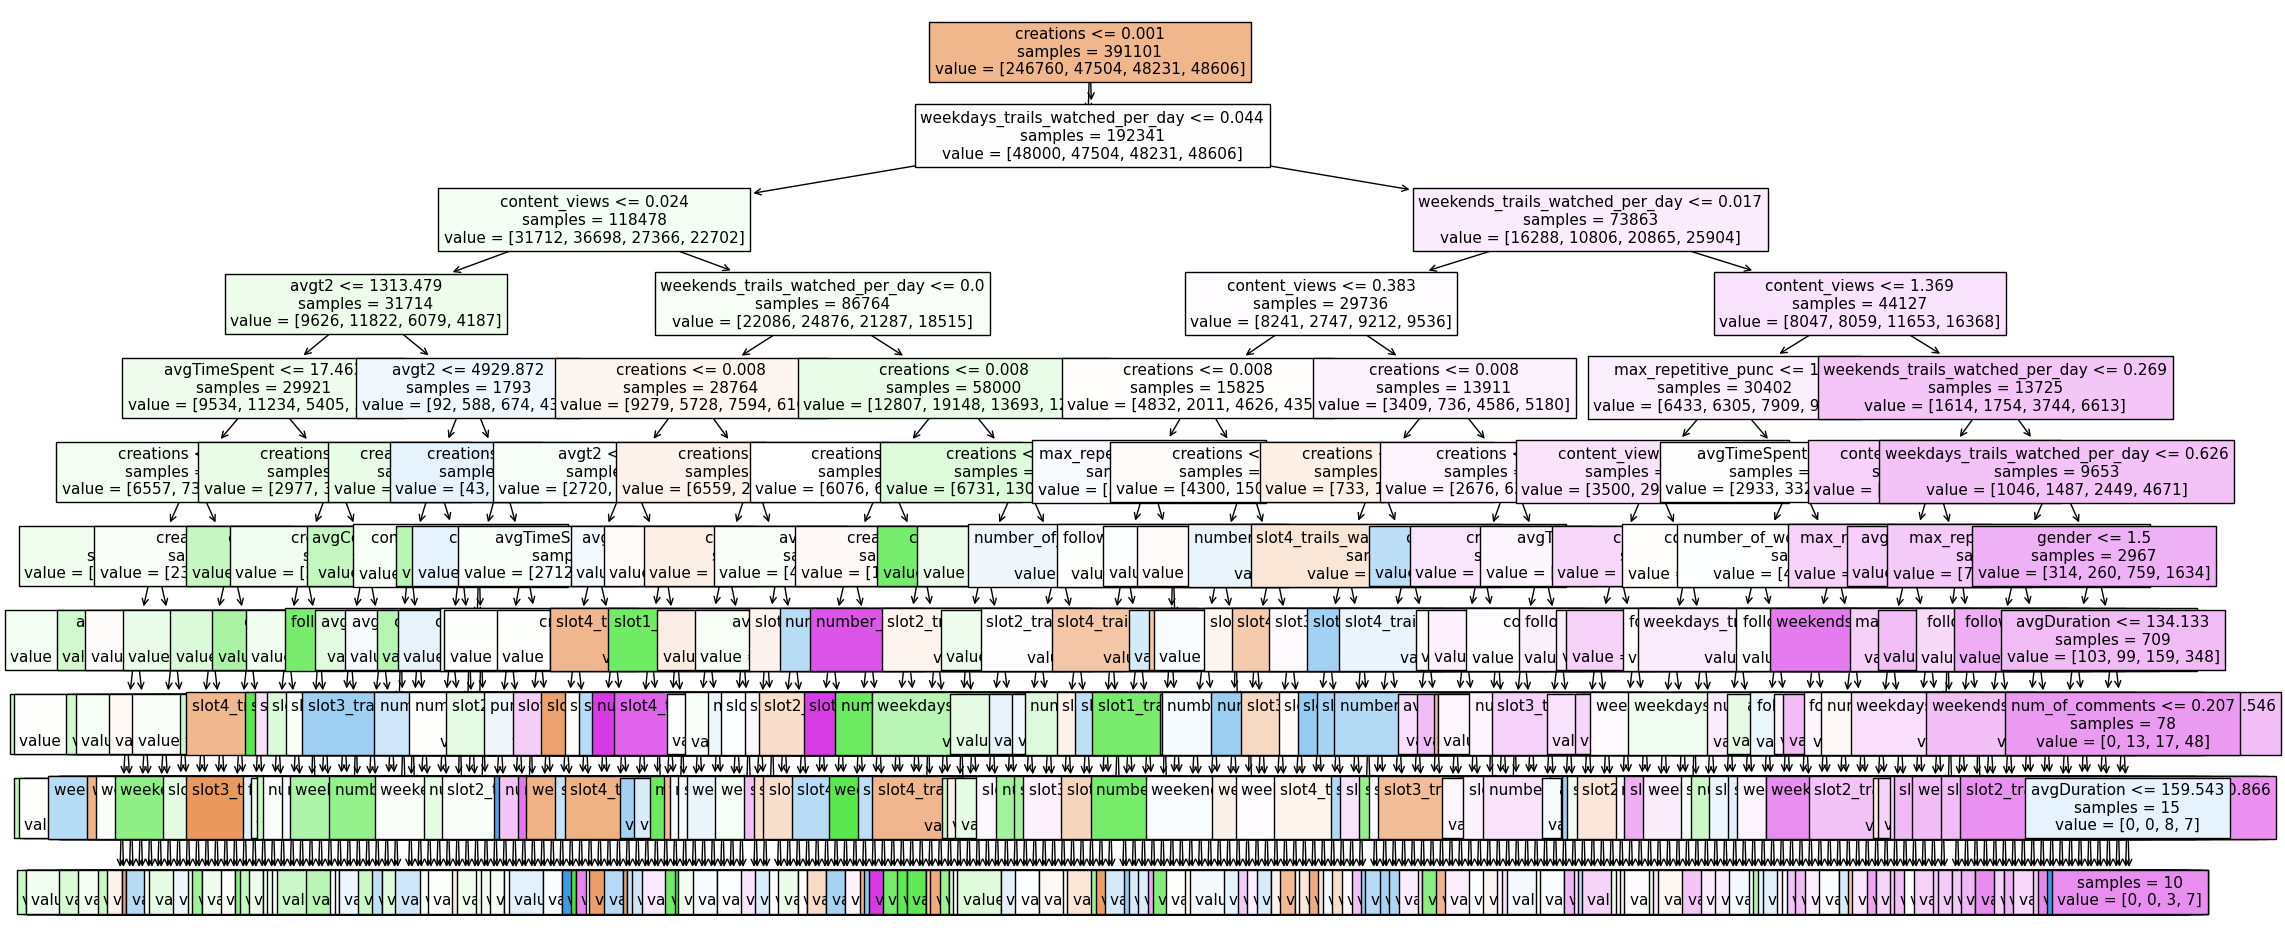

In [40]:
arbol(best_model, X_train)

In [41]:
from sklearn.metrics import classification_report

# Obtener el reporte de clasificación del mejor modelo
report = classification_report(y_test, y_pred_best)

# Imprimir el reporte
print("Reporte de Clasificación del Mejor Modelo:")
print(report)


Reporte de Clasificación del Mejor Modelo:
              precision    recall  f1-score   support

           1       0.89      0.88      0.88     61555
           2       0.40      0.62      0.48     11851
           3       0.44      0.26      0.33     12173
           4       0.43      0.39      0.41     12197

    accuracy                           0.71     97776
   macro avg       0.54      0.54      0.53     97776
weighted avg       0.72      0.71      0.71     97776



## <span style="color:DarkciónBlue"> 4. Conclusiones</span>

Con la clasificaciones del arbol nos podemos dar cuenta que tiene una precision del 71% debido a los datos brindados , puntaje F1-Score proporciona una medida del equilibrio entre precisión y recall. Un puntaje F1-Score más alto indica un mejor equilibrio entre estas dos métricas. En este caso, el puntaje F1-Score es relativamente bajo para todas las clases, lo que sugiere que el modelo puede estar teniendo dificultades para lograr un buen equilibrio entre precisión y recall en todas las clases.


## <span style="color:DarkciónBlue"> 5. Referencias</span>
### Documentos consultados 
A. Kothari, "Age Prediction for Beginners," Kaggle, Available: https://www.kaggle.com/code/arunkothari/age-prediction-for-beginners, Accessed: Mar. 25, 2024

MHND-DS, "Age Prediction for Beginners," Kaggle, Available: https://www.kaggle.com/code/mohannads/trell-social-media-dataset#Apply-the-ML-Model, Accessed: Mar. 25, 2024